# Create a simple modflow grid with flopy and display it with pyvista
    This requires MODFLOW executables. They can be compiled or binaries for different achitectures are available at https://github.com/MODFLOW-USGS/executables.
O. Kaufmann, 2021.

## Imports
    

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy

In [7]:
name = "tutorial01_mf6"
h1 = 100
Nlay = 10
N = 101
L = 400.0
H = 50.0
k = 1.0
q = -1000.0

In [8]:
sim = flopy.mf6.MFSimulation(
    sim_name=name, exe_name="mf6", version="mf6", sim_ws="."
)

In [9]:
tdis = flopy.mf6.ModflowTdis(
    sim, pname="tdis", time_units="DAYS", nper=1, perioddata=[(1.0, 1, 1.0)]
)

In [10]:
ims = flopy.mf6.ModflowIms(
    sim,
    pname="ims",
    complexity="SIMPLE",
    linear_acceleration="BICGSTAB",
)

In [11]:
model_nam_file = f"{name}.nam"
gwf = flopy.mf6.ModflowGwf(
    sim,
    modelname=name,
    model_nam_file=model_nam_file,
    save_flows=True,
    newtonoptions="NEWTON UNDER_RELAXATION",
)

In [12]:
bot = np.linspace(-H / Nlay, -H, Nlay)
delrow = delcol = L / (N - 1)
dis = flopy.mf6.ModflowGwfdis(
    gwf,
    nlay=Nlay,
    nrow=N,
    ncol=N,
    delr=delrow,
    delc=delcol,
    top=0.0,
    botm=bot,
)

In [13]:
start = h1 * np.ones((Nlay, N, N))
ic = flopy.mf6.ModflowGwfic(gwf, pname="ic", strt=start)

## Export the initial conditions as a shapefile

In [14]:
ic.export('test.shp')

wrote test.shp


In [15]:
import geopandas as gpd

In [16]:
gdf = gpd.read_file('test.shp')

<AxesSubplot:>

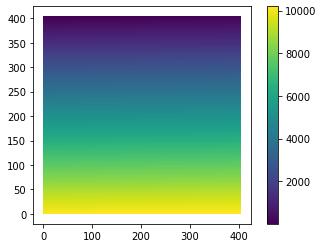

In [17]:
gdf.plot(column="node", legend=True)

In [18]:
gdf.head()

node  row  column  strt_1  strt_2  strt_3  strt_4  strt_5  strt_6  strt_7  \
0     1    1       1   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
1     2    1       2   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
2     3    1       3   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
3     4    1       4   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
4     5    1       5   100.0   100.0   100.0   100.0   100.0   100.0   100.0   

   strt_8  strt_9  strt_10                                           geometry  
0   100.0   100.0    100.0  POLYGON ((0.000 404.000, 4.000 404.000, 4.000 ...  
1   100.0   100.0    100.0  POLYGON ((4.000 404.000, 8.000 404.000, 8.000 ...  
2   100.0   100.0    100.0  POLYGON ((8.000 404.000, 12.000 404.000, 12.00...  
3   100.0   100.0    100.0  POLYGON ((12.000 404.000, 16.000 404.000, 16.0...  
4   100.0   100.0    100.0  POLYGON ((16.000 404.000, 20.000 404.000, 20.0...

In [19]:
ic.model_or_sim.export('test.nc')

initialize_geometry::proj4_str = epsg:4326
initialize_geometry::self.grid_crs = epsg:4326
initialize_geometry::nc_crs = epsg:4326
transforming coordinates using = proj=noop ellps=GRS80


/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/flopy/utils/reference.py:2074: DeprecationWarning: crs has been deprecated and will be removed in version 3.3.5. Use CRS in shapefile_utils instead.
  warnings.warn(


In [20]:
vtk = flopy.export.vtk.Vtk(ic.model_or_sim)

In [21]:
vtk.write('test.vtk')

In [22]:
from flopy.utils.gridgen import Gridgen

In [23]:
g = Gridgen(dis, model_ws='./tmp_files/flopy/', exe_name='/home/su530201/modflow/gridgen')

In [24]:
g.build()

In [25]:
import pyvista as pv

In [26]:
qtg = pv.read('./tmp_files/flopy/qtg.vtu')
qtg.set_active_scalars('layer')

In [27]:
qtg.plot(jupyter_backend='panel', window_size=(800,400), show_axes=True, cmap='jet', show_edges=True)

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filters['json'] = lambda obj: Markup(json.dumps(obj))
/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/panel/io/resources.py:43: D